In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm

import torch

from get_tokenizers import train_and_save_tokenizer_for, load_tokenizer_from

In [8]:
VOCAB_SIZES = [i * 1000 for i in range(1, 21)]
MIN_FREQUENCY = 2

IN_PATH = '../../data/SAMSum/train_summary_and_dialogue.txt'
OUT_DIR_PATH = '../trained_tokenizers/SAMSum_BPE/elbow/'

DF_DATA_PATH = '../../data/SAMSum/'

In [9]:
train_df = pd.read_json(DF_DATA_PATH + 'train_df.json', orient = 'records', lines = True)
val_df = pd.read_json(DF_DATA_PATH + 'val_df.json', orient = 'records', lines = True)
test_df = pd.read_json(DF_DATA_PATH + 'test_df.json', orient = 'records', lines = True)
all_df = pd.concat([train_df, val_df, test_df], axis = 0, ignore_index = True)

In [11]:
actual_vocab_sizes = list()
average_token_count_per_sequence = list()

token_ids = None
attention_mask = None

for vocab_size in tqdm(VOCAB_SIZES):

    bpe_tokenizer = train_and_save_tokenizer_for(in_file_paths = [IN_PATH], out_file_dir_path = OUT_DIR_PATH, vocab_size = vocab_size, min_frequency = MIN_FREQUENCY)
    pretrained_bpe_tokenizer = load_tokenizer_from(dir_path = OUT_DIR_PATH, model_max_length = 100)

    actual_vocab_sizes.append(pretrained_bpe_tokenizer.vocab_size)

    encoded = pretrained_bpe_tokenizer(
        all_df['dialogue'].tolist(),
        max_length = 100,
        padding = 'max_length',
        truncation = True,
        return_tensors = 'pt'
    )

    average_token_count_per_sequence.append(encoded['attention_mask'].sum(dim = 1, dtype = torch.long).mean(dtype = torch.float64))

print()
print(average_token_count_per_sequence)

  0%|          | 0/20 [00:00<?, ?it/s]huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  5%|▌         | 1/20 [00:12<03:55, 12.42s/it]

 10%|█         | 2/20 [00:16<02:19,  7.73s/it]

 15%|█▌        | 3/20 [00:21<01:46,  6.25s/it]

 20%|██        | 4/20 [00:25<01:29,  5.62s/it]

 25%|██▌       | 5/20 [00:30<01:18,  5.21s/it]

 30%|███       | 6/20 [00:35<01:09,  5.00s/it]

 35%|███▌      | 7/20 [00:39<01:04,  4.95s/it]

 40%|████      | 8/20 [00:45<01:00,  5.06s/it]

 45%|████▌     | 9/20 [00:49<00:53,  4.90s/it]

 50%|█████     | 10/20 [00:54<00:47,  4.75s/it]

 55%|█████▌    | 11/20 [00:58<00:42,  4.71s/it]

 60%|██████    | 12/20 [01:03<00:37,  4.64s/it]

 65%|██████▌   | 13/20 [01:07<00:32,  4.62s/it]

 70%|███████   | 14/20 [01:12<00:27,  4.58s/it]

 75%|███████▌  | 15/20 [01:17<00:23,  4.63s/it]

 80%|████████  | 16/20 [01:21<00:18,  4.67s/it]

 85%|████████▌ | 17/20 [01:26<00:14,  4.69s/it]

 90%|█████████ | 18/20 [01:31<00:09,  4.71s/it]

 95%|█████████▌| 19/20 [01:36<00:04,  4.86s/it]

100%|██████████| 20/20 [01:41<00:00,  5.08s/it]


[tensor(90.8558, dtype=torch.float64), tensor(87.7939, dtype=torch.float64), tensor(86.3737, dtype=torch.float64), tensor(85.5116, dtype=torch.float64), tensor(84.9258, dtype=torch.float64), tensor(84.5215, dtype=torch.float64), tensor(84.1988, dtype=torch.float64), tensor(83.9453, dtype=torch.float64), tensor(83.7525, dtype=torch.float64), tensor(83.6033, dtype=torch.float64), tensor(83.4655, dtype=torch.float64), tensor(83.3491, dtype=torch.float64), tensor(83.2558, dtype=torch.float64), tensor(83.1710, dtype=torch.float64), tensor(83.0983, dtype=torch.float64), tensor(83.0354, dtype=torch.float64), tensor(82.9761, dtype=torch.float64), tensor(82.9205, dtype=torch.float64), tensor(82.8683, dtype=torch.float64), tensor(82.8261, dtype=torch.float64)]


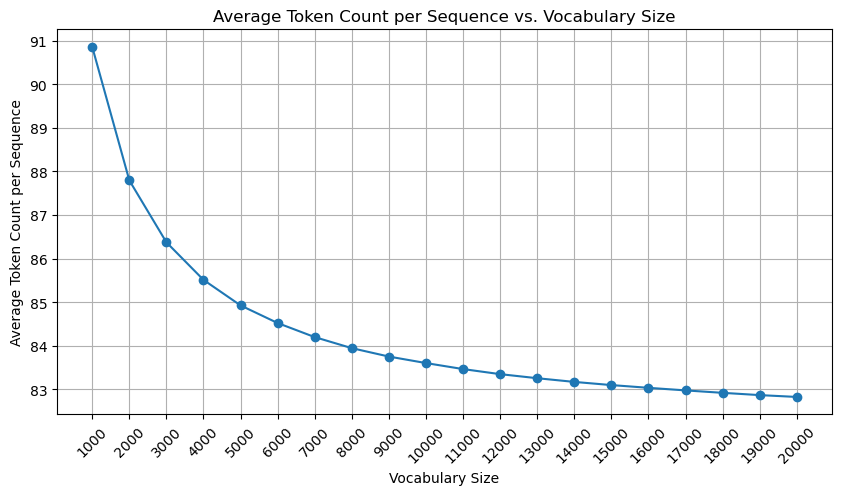

In [ ]:
plt.figure(figsize = (10, 5))
plt.plot(actual_vocab_sizes, average_token_count_per_sequence, marker = 'o')
plt.title('Average Token Count per Sequence vs. Vocabulary Size')
plt.xlabel('Vocabulary Size')
plt.ylabel('Average Token Count per Sequence')
plt.xticks(actual_vocab_sizes, rotation = 45)
plt.grid()
plt.show()